In [32]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Question 1: Explore the data set and extract insights using exploratory Data Analysis

In [33]:
#Import the data source csv file as a data frame
data = pd.read_csv('abtest.csv')
User_data = data.copy()
#Print the number of rows and columns
print (User_data.shape)
#Check for null values and duplicates
print (User_data.isna().sum())
print(User_data.duplicated().sum())
#Observation
#There are 100 rows of data with 6 columns
#No null values in the data set
#No Duplicate rows

(100, 6)
user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64
0


In [34]:
#Print the first five rows and last five rows to understand the data
print (User_data.head())
print (User_data.tail())

   user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48       yes   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish  
    user_id      group landing_page  time_spent_on_the_page converted  \
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86     

In [35]:
#Get the basic information of the data
print(User_data.info())
print(User_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
None
             user_id  time_spent_on_the_page
count     100.000000              100.000000
mean   546517.000000                5.377800
std        52.295779                2.378166
min    546443.000000                0.190000
25%    546467.750000                3.880000
50%    546492.500000                5.415000
75%    546567.250000                7.022500
max    546592.000000               10.710000


In [36]:
#Convert the objects to categorical data type
User_data['group'] = User_data['group'].astype('category')
User_data['landing_page'] = User_data['landing_page'].astype('category')
User_data['converted'] = User_data['converted'].astype('category')
User_data['language_preferred'] = User_data['language_preferred'].astype('category')
print(User_data.info())
#Observation
#All four objects are converted to categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB
None


In [37]:
#Get the count of users for new and old landing page
count_by_landingpage = (User_data.groupby(["landing_page"]).count())
#Rename the column time_spent_on_the_page to count in count_by_landingpage dataframe
count_by_landingpage.rename(columns = ({'time_spent_on_the_page':'Count'}), inplace = True)
#Print only the landingpage catgory and count column and drop all other columns
print (count_by_landingpage.drop(["user_id","group","converted","language_preferred"],axis=1))
#Observations
# Both the pages have equal number of users in the sample data

              Count
landing_page       
new              50
old              50


<AxesSubplot:xlabel='landing_page', ylabel='count'>

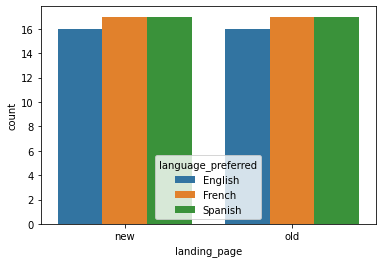

In [38]:
sns.countplot(x = "landing_page", data = User_data, hue = "language_preferred")

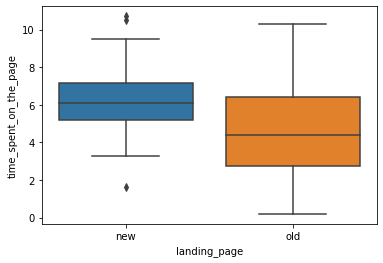

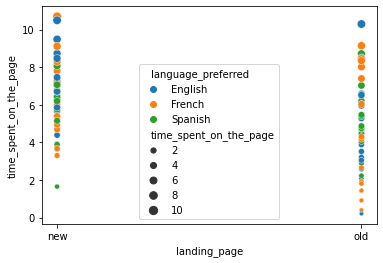

In [102]:
#Plot the visualization
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = User_data)
plt.show()
sns.scatterplot(x = "landing_page", y = "time_spent_on_the_page", hue = "language_preferred" , size = "time_spent_on_the_page", data = User_data)
plt.show()

Question 2: Do the users spend more time on the new landing page than the old landing page?

In [40]:
#Split the data by Landingpage(old&new) and get the mean and std.deviation for the time_spent_on_the_page
old_landing_page = User_data[User_data.landing_page == "old"]
new_landing_page = User_data[User_data.landing_page == "new"]
print(old_landing_page.shape)
print(new_landing_page.shape)
print(old_landing_page["time_spent_on_the_page"].mean())
print(new_landing_page["time_spent_on_the_page"].mean())
print(old_landing_page["time_spent_on_the_page"].std())
print(new_landing_page["time_spent_on_the_page"].std())
#Observations
#The average time spent on the new page by user is higher on the new page than the old page

(50, 6)
(50, 6)
4.532400000000001
6.2232
2.581974849306046
1.8170310387878263


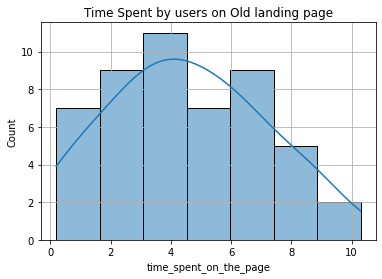

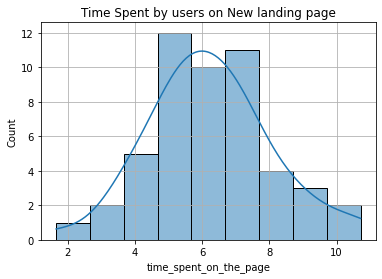

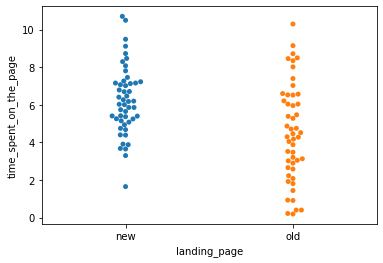

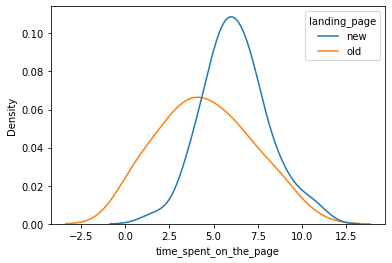

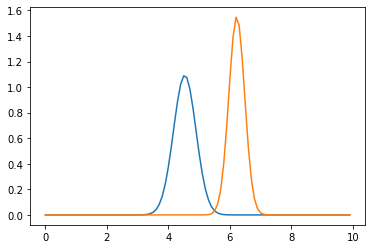

In [166]:
#Plot the visualization for the univariate analysis for the time spent on old landing page 
sns.histplot(x = "time_spent_on_the_page", data = old_landing_page, kde = True)
plt.title("Time Spent by users on Old landing page")
plt.grid(True)
plt.show()
sns.histplot(x = "time_spent_on_the_page", data = new_landing_page, kde = True)
plt.title("Time Spent by users on New landing page")
plt.grid(True)
plt.show()
sns.swarmplot(y = "time_spent_on_the_page", x ="landing_page", data = User_data)
plt.show() 
sns.kdeplot( x = "time_spent_on_the_page", hue = "landing_page", data = User_data)
plt.show()

import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
plt.plot(x, stats.norm.pdf(x, old_landing_page["time_spent_on_the_page"].mean(),
                           old_landing_page["time_spent_on_the_page"].std() / np.sqrt(50)))
plt.plot(x, stats.norm.pdf(x, new_landing_page["time_spent_on_the_page"].mean(),
                           new_landing_page["time_spent_on_the_page"].std() / np.sqrt(50)))
plt.show()


Null Hypothesis:
Let  𝜇1,𝜇2  be the mean time spent on the new landing page(𝜇1) and old landing page(𝜇2) respectively.

𝐻0:𝜇1=𝜇2 
    
Alternate hypothesis:

𝐻𝑎:𝜇1>𝜇2
    
We will test the null hypothesis

Assumptions:

Let's check whether the T-test assumptions are satisfied or not

1.Continuous data - Yes, the time spent on the page is measured on a continuous scale.

2.Normally distributed populations - Yes, from our sample size and Central limit theorem we can assume the population to be normally distributed.

3.Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.

4.Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.

5.Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

All conditions are satisfied. We are good to proceed with two sample one sided t-test

In [42]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new_landing_page['time_spent_on_the_page'].dropna(), old_landing_page['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

#Observation:
#The p-value is much lesser than the level of significance(0.05),we reject the null hypothesis.
#Hence we can conclude that the average time spent on the new landing page is greater than the old landing page

The p-value is  0.0001392381225166549


Conclusion:

As the p-value is much lesser than the level of significance(0.05),we reject the null hypothesis.

Hence we can conclude that the average time spent on the new landing page is greater than the old landing page at 5% significance level.

Question 3: Is the convertion rate(the proportion of users who visit the landing page and get converted)for the new page greater than the conversion rate for the old page?

In [43]:
old_landing_page_converted_user = old_landing_page[old_landing_page.converted == "yes"]
new_landing_page_converted_user = new_landing_page[new_landing_page.converted == "yes"]
print(old_landing_page_converted_user.count())
print(new_landing_page_converted_user.count())

user_id                   23
group                     23
landing_page              23
time_spent_on_the_page    23
converted                 23
language_preferred        23
dtype: int64
user_id                   32
group                     32
landing_page              32
time_spent_on_the_page    32
converted                 32
language_preferred        32
dtype: int64


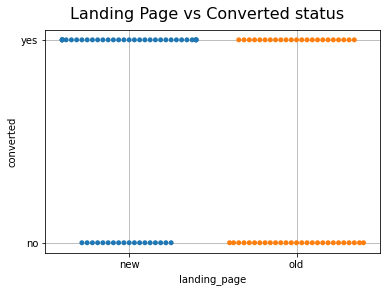

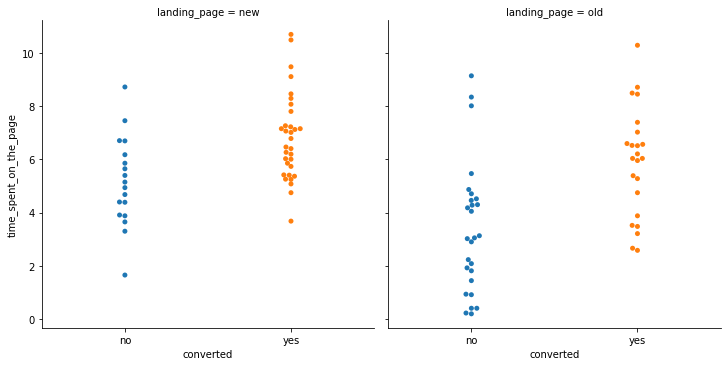

In [134]:
#Plot the bivariate visualization plot
sns.swarmplot(x = "landing_page", y = "converted",data = User_data)
plt.subplots_adjust(top=0.9)
plt.suptitle("Landing Page vs Converted status" ,fontsize = 16)
plt.grid(True)
plt.show()
sns.catplot(x = "converted", y = "time_spent_on_the_page",kind = "swarm",col = "landing_page",data = User_data)
plt.show()

Null Hypothesis:
Let  𝑝1,𝑝2  be the proportions of converted users in new landing page and old landing page respectively.

𝐻0:𝑝1=𝑝2 
New landing page conversion rate is equal to old landing page conversion rate

Alternate hypothesis:

𝐻𝑎:𝑝1>𝑝2 

New landing page conversion rate is greater than the old landing page conversion rate

We will test the null hypothesis

Assumptions:

Let's check whether the two proportion Z-test assumptions are satisfied or not

1.Binomally distributed population - Yes, user is either converted or not converted.

2.Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

3.Can the binomial distribution approximated to normal distribution - Yes. For binary data, Central Limit Theorem works slower than usual. 
The standard thing is to check whether np and n(1-p) are greater than or equal to 10.

𝑛𝑝1(conversion for new landing page)= 50.32/50 = 32 ≥ 10

𝑛(1−𝑝1)= 50*(50-32)/50 = 18 ≥ 10

𝑛𝑝2(convertion for old landing page)= 50.23/50 = 23 ≥ 10

𝑛(1−𝑝2)= 50*(50−23)/50 = 27 ≥ 10

In our case both the np and n(1-p) are greater than 10. We are good to proceed with two proportion one-sided ztest


In [72]:
#Find the p value
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
converted_user_count = np.array([32, 23])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_user_count, nobs, alternative = 'larger')
print('The p-value is ' + str(p_value))

#Observations:
#As the p-value is lesser than the significance level 0.05, we reject the null hypothesis. 
#Thus, we have enough statistical significance to conclude that the conversion rate of the new landing page is greater than the conversion rate of the old landing page


The p-value is 0.035220214636043995


Conclusion:

As the p-value is lesser than the significance level, we reject the null hypothesis.

Thus, we have enough statistical significance to conclude that the conversion rate of the new landing page is greater than the conversion rate of the old landing page at 5% significance level.

Question 4:
Does the converted status depend on the preferred language?

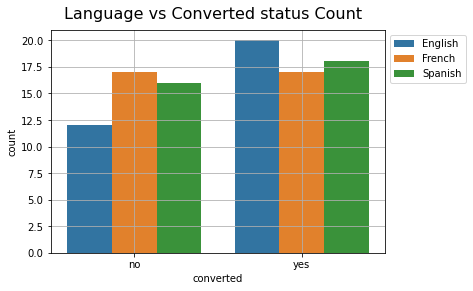

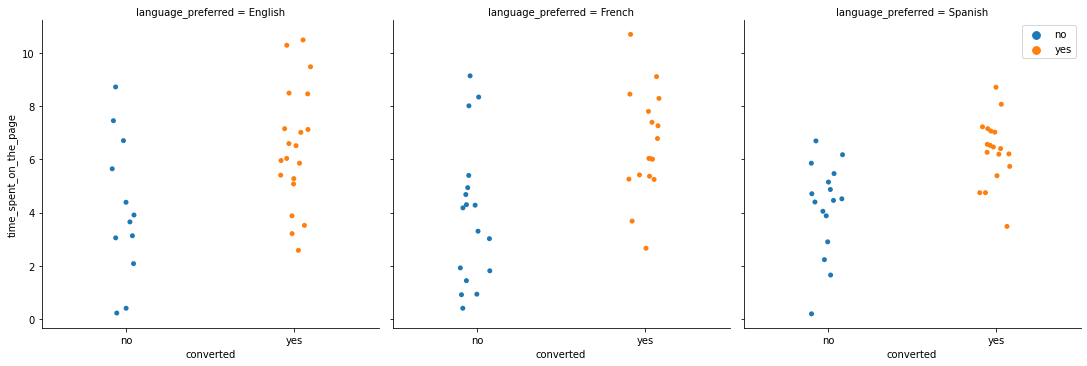

In [132]:
#Draw visualization plot
sns.countplot(x = "converted", data = User_data, hue = "language_preferred")
plt.subplots_adjust(top=0.9)
plt.suptitle("Language vs Converted status Count" ,fontsize = 16)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
sns.catplot(col = "language_preferred", x = "converted" ,y = "time_spent_on_the_page", hue = "converted",data = User_data)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [45]:
language_conversion_contigency = pd.crosstab(index = User_data["converted"],columns = User_data["language_preferred"])
print(language_conversion_contigency)

language_preferred  English  French  Spanish
converted                                   
no                       12      17       16
yes                      20      17       18


Null hypothesis:

𝐻0:  Converted Status is independent of language.

Alternate hypothesis:

𝐻𝑎:  Converted Status depends on language.

We will test the null hypothesis

Assumptions:
    
Let's check whether the assumptions are satisfied or not

1.Categorical variables - Yes

2.Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.

3.Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

As all the assumptions are satisfied, we are good to proceed with Chi Square test for Independence

In [46]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(language_conversion_contigency)
print('The p-value is', p_value)

#Observation:
#Since p-value is much greater level of significance of 0.05, we fail to reject the null hypothesis and hence we can say that the converted status is independent of language

The p-value is 0.5686624745121615


Conclusion:

As the p-value is much greater than the significance level, we fail to reject the null hypothesis.

Hence, we can say that the converted status is independent of language at 5% significance level.

Question 5:
Is the mean time spent on the new page same for the different language users?

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64
language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


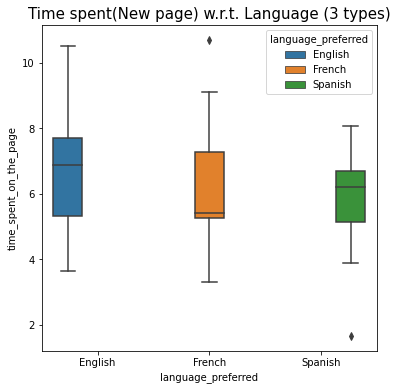

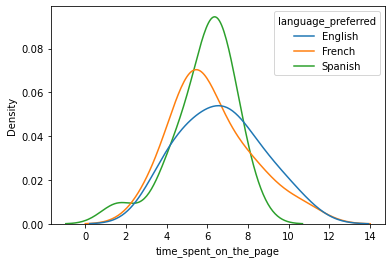

In [99]:
# Get the language types and count for new landing page dataset
print(new_landing_page['language_preferred'].value_counts())

# Calculate the mean time spent on the new landing page for different languages 
print(new_landing_page.groupby("language_preferred")["time_spent_on_the_page"].mean())

# Draw the histogram and boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = new_landing_page, hue = 'language_preferred')
a.set_title("Time spent(New page) w.r.t. Language (3 types)", fontsize=15)
plt.show()
sns.kdeplot( x = "time_spent_on_the_page", hue = "language_preferred", data = new_landing_page)
plt.show()

Null Hypothesis:

Let  𝜇1,𝜇2,𝜇3  be the means of time spent on the new landing page for English(𝜇1), French(𝜇2) and Spanish(𝜇3) language users respectively.

𝐻0:𝜇1=𝜇2=𝜇3 (all three language users spend equal time on the new landing page)

Alternate Hypothesis:

𝐻𝑎:The time spent on the new landing page for atleast one language user is different from the rest.

We will test the null hypothesis

Assumptions:

Now, the normality and equality of variance assumptions need to be checked.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of varaince, Levene test is applied to the response variable.

Shapiro-Wilk’s test
We will test the null hypothesis

𝐻0: Time spent on new landing page follows a normal distribution against

against the alternative hypothesis

𝐻𝑎: Time spent on new landing page does not follow a normal distribution

In [100]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_landing_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

Levene’s test
We will test the null hypothesis

𝐻0 : All the population variances are equal

against the alternative hypothesis

𝐻𝑎 : At least one variance is different from the rest

In [49]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="English"], 
                                   new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="French"], 
                                   new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

Let's check whether the assumptions are satisfied or not

1.The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.

2.Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.

3.Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

In [160]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_landing_page.loc[new_landing_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_landing_page.loc[new_landing_page['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              new_landing_page.loc[new_landing_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


6.6637499999999985 6.196470588235294 5.835294117647059


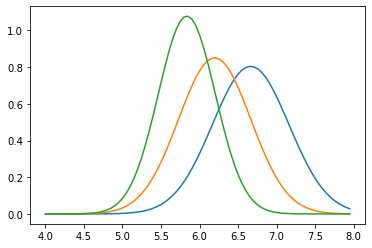

In [165]:
time_english = new_landing_page.loc[new_landing_page['language_preferred'] == 'English', 'time_spent_on_the_page']
time_french = new_landing_page.loc[new_landing_page['language_preferred'] == 'French', 'time_spent_on_the_page']
time_spanish = new_landing_page.loc[new_landing_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page']

mean_time_english = time_english.mean()
mean_time_french = time_french.mean()
mean_time_spanish = time_spanish.mean()
std_time_english = time_english.std()
std_time_french = time_french.std()
std_time_spanish = time_spanish.std()

print(mean_time_english, mean_time_french, mean_time_spanish)

import matplotlib.pyplot as plt
x = np.arange(4, 8, 0.05)
plt.plot(x, stats.norm.pdf(x, mean_time_english,
                           std_time_english / np.sqrt(time_english.count())))
plt.plot(x, stats.norm.pdf(x, mean_time_french,
                          std_time_french / np.sqrt(time_french.count())))
plt.plot(x, stats.norm.pdf(x, mean_time_spanish,
                          std_time_spanish / np.sqrt(time_spanish.count())))
plt.show()


Conclusion:

As the p-value is much greater than the significance level, we fail to reject the null hypothesis.

Hence, we do have enough statistical significance to conclude that all the three language users spend almost equal time on the new landing page at 5% significance level.